## Aalto Wine Quality Prediction : T-61.3050 Challenge

**Problem Statement** : Jorma, Alex and the T.A's need your help selecting the perfect bottle of wine for that special occasion. Since we don't know much about wine itself, we're hoping that training data with expert ratings will help us decide what makes a 'good' wine good. Use the training data to predict the quality of unrated wines in the test data.

### Steps performed in predicting

a) Performing exploratory data analysis using PCA to find top features using t-SNE for visualizing the data
  
  We are not using pair plots because there are 11 features. Plotting a pair plot for more than 4 features might be cumbersome task. So,using t-SNE we visualize the data


b) Using Classification algorithm predicting the quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the training data and perforing analysis on this data

wine_data = pd.read_csv("training_classification_regression_2015.csv")

In [3]:
wine_data.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality,type
0,6.945513,0.272992,0.403691,13.920038,0.051043,66.077662,245.612070,0.998768,3.161269,0.579738,9.504513,4,White
1,6.995486,0.190402,0.310377,19.186267,0.044147,39.852796,175.908433,1.000245,2.932994,0.523323,9.112224,3,White
2,5.978831,0.140616,0.251393,4.402912,0.028109,32.093612,151.569367,0.995412,3.488070,0.511582,11.077951,4,White
3,6.688603,0.371501,0.507942,11.862843,0.044918,67.531739,155.608503,0.998803,3.174425,0.439773,8.853944,5,White
4,7.224421,0.201252,0.220918,1.612570,0.044984,16.817987,121.629623,0.995424,3.373870,0.528637,10.366208,5,White


In [4]:
#shape of the data
wine_data.shape

(5000, 13)

5000 observations and 13 features 

Of which two features ['quality' , 'type'] are class variables 

In [5]:
#lets analyze the data using value_counts to further know whether it is balanced data or imbalanced data

wine_data['quality'].value_counts()

4    2191
5    1625
3     842
6     165
2     156
7      20
1       1
Name: quality, dtype: int64

In [6]:
wine_data['type'].value_counts()

White    4086
Red       914
Name: type, dtype: int64

In [7]:
wine_data_without_class_variables = wine_data[wine_data.columns[:11]]

In [8]:
wine_data_without_class_variables.shape

(5000, 11)

 it is the dataset without class variable , we can use this for dimensionality reduction, visualization(t-SNE)

**Initial Observation**

1 . There are two class variables (Quality and Type)

2 . Quality has 7 classes (1-7) and 

3 . Type has two types (white and red)

It is an imbalanced dataset

### Exploratory data analysis

In [9]:
# Data-preprocessing: Standardizing the data to get all the data into same interval (column standardization)
# that mean each column will have mean = 0 and standard deviation = 1

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(wine_data_without_class_variables)
print(standardized_data.shape)


(5000, 11)


In [10]:
sample_data = standardized_data

#### Using PCA let's reduce the features , lets find how many features to be reduced so that we can preserve as much variance as possible
We use Scikit-learn to compute principal features

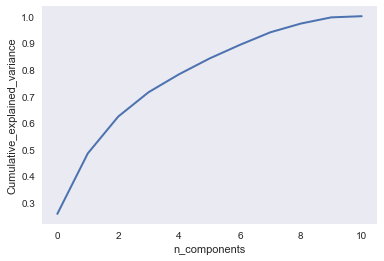

In [11]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# PCA for dimensionality redcution 

pca.n_components = 11
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



#### **Observation**:
   
   From the above plot we can understand that if we reduce our features from 11 to 6-7 , then we can preserve over 90% of variance

### Visualizing the data 

**Using t-SNE (t distributed Stochastic Neighborhood embedding) might not be a good solution for this data**. Because we typically use t-SNE for large dimensional dataset.As we have only 11 dimensions , it is not ideal to use , let's use
**PCA for visualization**.

In [12]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projections of simple data(sample data)
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (5000, 2)


In [13]:
wine_data_quality = wine_data['quality']

In [14]:
wine_data_quality.shape

(5000,)

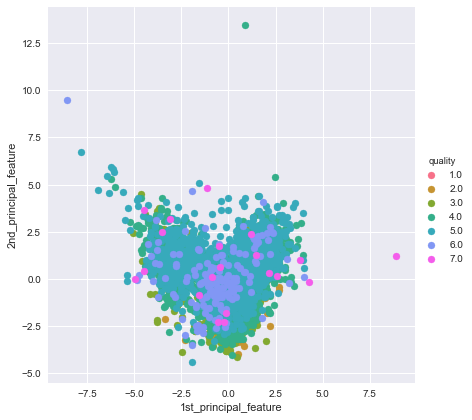

In [18]:
# attaching the label for each 2-d data point 
pca_data_stack = np.vstack((pca_data.T, wine_data_quality)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data_stack, columns=("1st_principal_feature", "2nd_principal_feature", "quality"))
sns.FacetGrid(pca_df, hue="quality", size=6).map(plt.scatter, "1st_principal_feature", "2nd_principal_feature").add_legend()
plt.show()

**Observation:**
    
1.We cannot interpret anything from this plot as most of the points are overlapped moreover it is an imbalanced data. So, there are more datapoints which have quality 5.

##### As it is imbalanced dataset , we can deal with this type of data in various methods like undersampling, oversampling but each have it's own drawbacks. 

In [20]:
wine_data_without_class_variables.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol
0,6.945513,0.272992,0.403691,13.920038,0.051043,66.077662,245.612070,0.998768,3.161269,0.579738,9.504513
1,6.995486,0.190402,0.310377,19.186267,0.044147,39.852796,175.908433,1.000245,2.932994,0.523323,9.112224
2,5.978831,0.140616,0.251393,4.402912,0.028109,32.093612,151.569367,0.995412,3.488070,0.511582,11.077951
3,6.688603,0.371501,0.507942,11.862843,0.044918,67.531739,155.608503,0.998803,3.174425,0.439773,8.853944
4,7.224421,0.201252,0.220918,1.612570,0.044984,16.817987,121.629623,0.995424,3.373870,0.528637,10.366208


In [35]:
sample_data #this is a numpy array (we have standardized the original data to get this)

array([[-0.19583107, -0.33864883,  0.54306071, ..., -0.31063074,
         0.39002384, -0.80353718],
       [-0.15725967, -0.87330518, -0.12404425, ..., -1.75484854,
         0.00219045, -1.12884446],
       [-0.94194895, -1.19559677, -0.54572172, ...,  1.75692465,
        -0.07852325,  0.50124509],
       ...,
       [-0.10381393, -0.7296773 , -0.04677105, ..., -0.03673834,
         0.34939361, -0.3084982 ],
       [ 0.23771623, -0.61773953, -0.4740231 , ..., -1.09290921,
        -0.57396303, -1.16372337],
       [-0.40059683, -0.16096216,  1.25782885, ..., -1.16674536,
         0.08149233, -1.33462896]])

### Training the model with various Machine Learning algorithms and see which algorithm works better

We have only training data , we will split this training data into train_data and test_data to verify the accuracy



In [76]:
from sklearn.model_selection import train_test_split  
sample_data_train, sample_data_test, wine_data_quality_train, wine_data_quality_test = train_test_split(sample_data, wine_data_quality, test_size=0.20,random_state = 0) 

In [77]:
sample_data_test.shape

(1000, 11)

In [78]:
sample_data_train.shape

(4000, 11)

In [79]:
wine_data_quality_test.shape

(1000,)

In [80]:
wine_data_quality_train.shape

(4000,)

### Using k-nn Classification

Here we use cross-validation data as test data (by which we can also find optimal k) and keeping test-data aside(making test-data untouched one). So, after finding the accuracy we can generalize orelse we can't generalize.

After generalizing we can use test-dataset to find the quality predictions



In [59]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

# split the train data set into cross validation train and cross validation test
data_train, data_cv, qualitylabel_train, qualitylabel_cv = cross_validation.train_test_split(sample_data_train, wine_data_quality_train, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i) #trying for 1 to 30 k values to find optimal k

    # fitting the model on crossvalidation train
    knn.fit(data_train, qualitylabel_train)

    # predict the response on the crossvalidation train
    prediction = knn.predict(data_cv)

    # evaluate CV accuracy
    accuracy = accuracy_score(qualitylabel_cv, prediction, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, accuracy))
    


C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



CV accuracy for k = 1 is 55%

CV accuracy for k = 3 is 50%

CV accuracy for k = 5 is 52%

CV accuracy for k = 7 is 52%

CV accuracy for k = 9 is 52%

CV accuracy for k = 11 is 52%

CV accuracy for k = 13 is 52%

CV accuracy for k = 15 is 51%

CV accuracy for k = 17 is 51%

CV accuracy for k = 19 is 50%

CV accuracy for k = 21 is 50%

CV accuracy for k = 23 is 52%

CV accuracy for k = 25 is 52%

CV accuracy for k = 27 is 51%

CV accuracy for k = 29 is 52%


### 10-fold cross validation

In [61]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data_train, qualitylabel_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The m


The optimal number of neighbors is 1.


**Observation** :
    In our dataset ,** it is imbalanced dataset , for our class variable 'quality' (which has only one datapoint that have class-variable (quality) value 1 , that might the reason we are triggering with these warnings**).
    
   
  

In [70]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(sample_data_train, wine_data_quality_train)

# predict the response
pred = knn_optimal.predict(sample_data_test)

# evaluate accuracy
acc = accuracy_score(wine_data_quality_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 57.666667%


### Observation : 

--> 57.66% can be generalized when we use K-nn algorithm

As we got optimal-k value as 1 , it is better to switch to different algorithm (ensemble methods) random_forest or decision_tree. So,that we might improve our model. We switch to random_forest because it works fine in imbalanced datasets when compared to some of the other classification models

## Using random_forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [82]:
random_forest_classifier.fit(sample_data_train,wine_data_quality_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
#Predicting the result for test data
prediction_label = random_forest_classifier.predict(sample_data_test)

In [127]:
#Creating confusion matrix and checking the accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
confusionMatrix = confusion_matrix(wine_data_quality_test,prediction_label)
accuracy_score(wine_data_quality_test,prediction_label)

0.564

In [129]:
#accuracy score is 
accuracy_score(wine_data_quality_test,prediction_label)*100

56.39999999999999

**Observation**: 

1.Accuracy = 56.39% in case of predicting quality of given wine_dataset when we use random_forest to predict the data

2.This can be generalized because we haven't used sample_data_test while creating a model (as here also sample_data_test can be considered as untouched data) that means we can predict that Given new wine data our chances of predicting it's quality will be 56.3%

3.Accuracy we got in K-NN is slightly more when compared to this. But, we stick to Random Forest because Random Forest can be functioned well for unbalanced data when compared to K-NN.



In [134]:
#loading the test dataset and predict the class-variable(quality) to that dataset

wine_data_test = pd.read_csv("challenge_public_test_classification_regression_2015.csv")

In [135]:
wine_data_test.shape

(1000, 14)

In [136]:
wine_data_test.head()

,id,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality,type
0,1,6.623879,0.350308,0.291192,14.231505,0.044939,56.313779,173.311310,1.000947,3.184398,0.579831,9.107156,NaN,NaN
1,2,7.001997,0.360802,0.251197,5.802122,0.016012,14.184137,66.170046,0.990834,2.847829,0.593433,13.064054,NaN,NaN
2,3,8.365224,0.199237,0.313605,2.790155,0.054998,16.875336,83.105477,0.994815,2.959980,0.451726,9.570900,NaN,NaN
3,4,7.206049,0.262821,0.300107,9.007575,0.051003,33.906743,169.741299,0.996002,3.217775,0.496368,10.519251,NaN,NaN
4,5,6.915703,0.338247,0.735664,11.227664,0.069907,45.824847,143.626491,0.997954,3.015690,0.811228,9.388134,NaN,NaN


In [137]:
wine_data_test_needed = wine_data_test[wine_data_test.columns[1:12]]

In [138]:
wine_data_test_needed.shape

(1000, 11)

In [139]:
wine_data_test_needed.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol
0,6.623879,0.350308,0.291192,14.231505,0.044939,56.313779,173.311310,1.000947,3.184398,0.579831,9.107156
1,7.001997,0.360802,0.251197,5.802122,0.016012,14.184137,66.170046,0.990834,2.847829,0.593433,13.064054
2,8.365224,0.199237,0.313605,2.790155,0.054998,16.875336,83.105477,0.994815,2.959980,0.451726,9.570900
3,7.206049,0.262821,0.300107,9.007575,0.051003,33.906743,169.741299,0.996002,3.217775,0.496368,10.519251
4,6.915703,0.338247,0.735664,11.227664,0.069907,45.824847,143.626491,0.997954,3.015690,0.811228,9.388134


In [140]:
#Scaling the data
standardized_data_test = StandardScaler().fit_transform(wine_data_test_needed)
print(standardized_data_test.shape)


(1000, 11)


In [141]:
test_data_sample = standardized_data_test

random_forest_classifier is the model or classifier which we created using trained data

#### Predicting the quality for the test dataset

In [142]:
prediction_label_test = random_forest_classifier.predict(test_data_sample)

In [143]:
prediction_label_test

array([4, 3, 3, 4, 5, 4, 5, 4, 4, 3, 3, 4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4,
       3, 3, 5, 4, 4, 5, 4, 4, 4, 6, 3, 4, 5, 5, 4, 4, 5, 4, 4, 5, 3, 4,
       4, 4, 2, 4, 3, 4, 5, 4, 4, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 3, 4,
       4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5, 4, 3, 5, 4, 4, 3, 5, 4, 5, 4, 5,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4,
       4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 4, 4, 4, 3, 5, 4, 4, 5, 4, 4, 5,
       4, 4, 4, 4, 4, 5, 3, 3, 5, 5, 3, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 4,
       4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 3, 4, 4, 5, 5,
       4, 3, 5, 5, 3, 4, 5, 5, 4, 5, 4, 4, 5, 5, 5, 4, 4, 4, 4, 3, 3, 5,
       4, 4, 3, 5, 3, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 3, 4, 4, 3, 5, 5,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 3, 4, 3, 4, 3, 5, 4, 5, 4,
       5, 4, 5, 5, 3, 4, 4, 4, 5, 4, 3, 5, 5, 3, 3, 5, 4, 5, 3, 4, 3, 3,
       4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 5, 4, 2, 5, 4, 4, 4, 4, 4, 3, 4,
       4, 5, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 3, 3, 2,

In [149]:
predicted_quality = pd.Series(prediction_label_test)

### Predicting the class- variable (type) 

##### Another class variable (type) in the wine_dataset

In [132]:
#creating a duplicate copy of the dataset
wine_data_dup = wine_data

In [105]:
def convert(i):
    if i == 'White':
        return 0
    else:
        return 1

In [106]:
wine_data_dup['type'] = wine_data_dup['type'].apply(convert)

In [108]:
wine_data_dup['type'].value_counts()

0    4086
1     914
Name: type, dtype: int64

In [109]:
wine_data_Type = wine_data_dup['type']

In [110]:
wine_data_Type.shape

(5000,)

In [111]:
wine_data_Type.value_counts()

0    4086
1     914
Name: type, dtype: int64

In [133]:
#splitting the data based on the class-variable[type]  
sample_data_train_2,sample_data_test_2,wine_data_quality_train_2,wine_data_quality_test_2 = train_test_split(sample_data, wine_data_Type, test_size=0.20,random_state = 0) 

In [118]:
sample_data_test_2.shape

(1000, 11)

In [120]:
wine_data_quality_test_2.value_counts()

0    823
1    177
Name: type, dtype: int64

In [123]:
wine_data_quality_train_2.value_counts()

0    3263
1     737
Name: type, dtype: int64

In [121]:
random_forest_classifier_2 = RandomForestClassifier()

In [122]:
random_forest_classifier_2.fit(sample_data_train_2,wine_data_quality_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
#Predicting the result for test data
prediction_label_2 = random_forest_classifier_2.predict(sample_data_test_2)

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusionMatrix = confusion_matrix(wine_data_quality_test_2,prediction_label_2)
print(confusionMatrix)
accuracy_score(wine_data_quality_test_2,prediction_label_2)

[[820   3]
 [  6 171]]


0.991

### Predicting the class- variable (type) on test-dataset


#### Predicting the class-variable(type) for the test dataset

In [145]:
prediction_label_test_type = random_forest_classifier_2.predict(test_data_sample)

In [146]:
prediction_label_test_type

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

 ### 0 -  indicates White
    
 ### 1 - indicates Red

In [150]:
predicted_type = pd.Series(prediction_label_test_type).map({0:"White",1:"Red"})

In [151]:
df = pd.DataFrame({"id":wine_data_test['id'],"quality":predicted_quality,"type":predicted_type})

In [153]:
df.head()

,id,quality,type
0,1,4,White
1,2,3,White
2,3,3,White
3,4,4,White
4,5,5,White


In [154]:
df.to_csv("output.csv",index=False)